Process hashtags:
  Hi how are you doing today 
2145


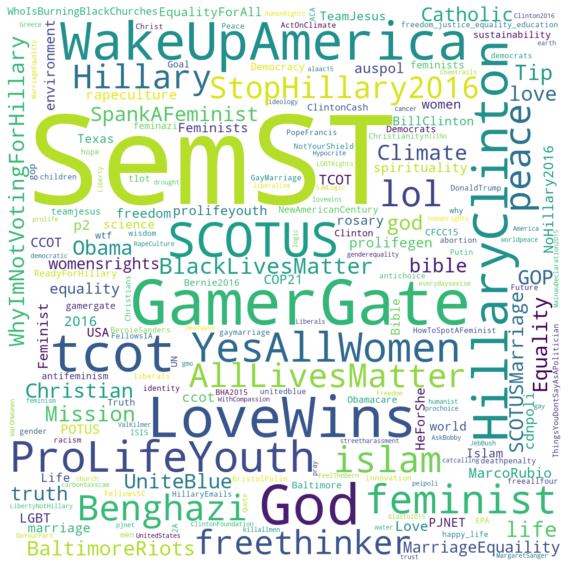

,Tweet,Target,Stance,Opinion Towards,Sentiment,Processed_Tweet_sw,Processed_Tweet,Hashtag,num#,POS_tags,...,RatioNUM,RatioPART,RatioPRON,RatioPROPN,RatioPUNCT,RatioSCONJ,RatioSYM,RatioVERB,RatioX,tokenize
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,Argumentative,neg,wiped clean deleted emails explains derelictio...,and she wiped clean deleted emails explain...,"[HandOverTheServer, Benghazi, tcot]",3,"[CCONJ, SPACE, PRON, VERB, ADJ, SPACE, VERB, N...",...,0.0,0.000000,0.055556,0.0,0.0,0.000000,0.0,0.222222,0.055556,"[wiped, clean, deleted, emails, explains, dere..."
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,Argumentative,pos,hillary best choice truly want continue progre...,hillary is our best choice if we truly want to...,[Ohio],1,"[NOUN, AUX, PRON, ADJ, NOUN, SCONJ, PRON, ADV,...",...,0.0,0.066667,0.200000,0.0,0.0,0.066667,0.0,0.466667,0.066667,"[hillary, best, choice, truly, want, continue,..."
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,Argumentative,neg,think country ready female pres cant ever hillary,i think our country is ready for a female pres...,[],0,"[PRON, VERB, PRON, NOUN, AUX, ADJ, ADP, DET, A...",...,0.0,0.117647,0.352941,0.0,0.0,0.058824,0.0,0.529412,0.058824,"[think, country, ready, female, pres, cant, ev..."
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,Argumentative,neg,gave unhealthy amount hardearned money away bi...,i just gave an unhealthy amount of my hardearn...,[WhyImNotVotingForHillary],1,"[PRON, ADV, VERB, DET, ADJ, NOUN, ADP, PRON, V...",...,0.0,0.111111,0.444444,0.0,0.0,0.055556,0.0,0.611111,0.055556,"[gave, unhealthy, amount, hardearned, money, a..."
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,Non_Argumentative,pos,thank adding list,thank you for adding me to your list,[],0,"[VERB, PRON, ADP, VERB, PRON, ADP, PRON, NOUN]",...,0.0,0.250000,1.375000,0.0,0.0,0.125000,0.0,1.625000,0.125000,"[thank, adding, list]"


In [1]:
import nltk
from nltk.tokenize import TweetTokenizer
import demoji
import pickle
import string
import re
import string
from nltk.corpus import words
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import wordninja
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder



## Data Cleaning and Preprocessing

train_tweets = pd.read_csv('/Users/william/Desktop/Thesis_code/StanceDataset/train.csv',lineterminator='\r',encoding='latin1')

test_tweets = pd.read_csv('/Users/william/Desktop/Thesis_code/StanceDataset/test.csv',lineterminator='\r',encoding='utf-8')

train_tweets['Target'].unique()

test_tweets.head()


var = train_tweets.loc[train_tweets['Opinion Towards'] == '1.  The tweet explicitly expresses opinion about the target, a part of the target, or an aspect of the target.']





train_tweets.head()



def labelArgument(data):
    data['Opinion Towards'] = data['Opinion Towards'].replace(['1.  The tweet explicitly expresses opinion about the target, a part of the target, or an aspect of the target.'],'Argumentative')
    data['Opinion Towards'] = data['Opinion Towards'].replace(['3.  The tweet is not explicitly expressing opinion. (For example, the tweet is simply giving information.)',
                                                              '2. The tweet does NOT expresses opinion about the target but it HAS opinion about something or someone other than the target.'],'Non_Argumentative')
    
labelArgument(train_tweets)
labelArgument(test_tweets)




#gobal
PunctChars = r'''[`'“".?!,:;]'''
Punct = '%s+' % PunctChars
Entity = '&(amp|lt|gt|quot);'
printable = set(string.printable)



apostrophe_expansions = {
"y": "why",
"u": "you",
"r": "are",
"luv": "love",
"&" : "and",
"idk" : "i do not know",
"imo" : "in my opinion",
"ain't": "are not",
"aren't": "are not ",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had ",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he shall have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": " they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": " when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def contractions(text):    
           return  " ".join([ apostrophe_expansions[word] if word in apostrophe_expansions else word for word in text.split() ] )

def find_all_hashtags(text):
    hashtags = re.findall(r"#(\w+)", text)
    return hashtags




# # helper functions
def regex_or(*items):
    r = '|'.join(items)
    r = '(' + r + ')'
    return r

def pos_lookahead(r):
    return '(?=' + r + ')'

def neg_lookahead(r):
    return '(?!' + r + ')'

def optional(r):
    return '(%s)?' % r

def trim(transient_tweet_text):
    ''' 
    trim leading and trailing spaces in the tweet text
    '''
    return transient_tweet_text.strip()

def strip_whiteSpaces(transient_tweet_text):
    '''
    Strip all white spaces
    '''
    transient_tweet_text = re.sub(r'[\s]+', ' ', transient_tweet_text)
    return transient_tweet_text

def strip_unicode(transient_tweet_text):
    '''
    Strip all unicode characters from a tweet
    '''
    tweet = ''.join(i for i in transient_tweet_text if ord(i)<128)
    return tweet 



def to_LowerCase(transient_tweet_text):
    '''
    Convert tweet text to lower to lower case alphabets
    '''
    transient_tweet_text = transient_tweet_text.lower()
    return transient_tweet_text


def prune_multple_consecutive_same_char(transient_tweet_text):
    '''
    yesssssssss  is converted to yess 
    ssssssssssh is converted to ssh
    '''
    transient_tweet_text = re.sub(r'(.)\1+', r'\1\1', transient_tweet_text)
    return transient_tweet_text


def process_HashTags(transient_tweet_text):
    '''
    Strip all Hashtags from a tweet
    '''
    transient_tweet_text = re.sub(r"#(\w+)\b", '', transient_tweet_text)
    return transient_tweet_text


def parse_hashtag(sentence):
    new_sentence = " " # output    
    terms = sentence.split()    
    for term in terms:
        if term[0] == '#': # this is a hashtag, parse it
            if sum(1 for c in term if c.isupper()) > 1:
                parsed_words = " ".join(re.findall('[A-Z][^A-Z]*',term))
            else:        
                parsed_words = " ".join(wordninja.split(term))
            new_sentence+= parsed_words
        else: # Just append the word
            new_sentence+= term
        new_sentence+= " "

    return new_sentence  


def remove_hashtag(tweet):
    #remove #SemST hashtag which was the hashtag used to query for the tweets
    terms = tweet.split()
    new_sentence = " "
    for term in terms:
        if term != "#SemST":
            new_sentence+= term
        new_sentence+= " "
    return new_sentence


def process_URLs(transient_tweet_text):
    '''
    replace all URLs in the tweet text
    '''
    UrlStart1 = regex_or('https?://', r'www\.',r'bit.ly/')
    CommonTLDs = regex_or('com','co\\.uk','org','net','info','ca','biz','info','edu','in','au')
    UrlStart2 = r'[a-z0-9\.-]+?' + r'\.' + CommonTLDs + pos_lookahead(r'[/ \W\b]')
    UrlBody = r'[^ \t\r\n<>]*?'  # * not + for case of:  "go to bla.com." -- don't want period
    UrlExtraCrapBeforeEnd = '%s+?' % regex_or(PunctChars, Entity)
    UrlEnd = regex_or( r'\.\.+', r'[<>]', r'\s', '$')
    Url = 	(optional(r'\b') + 
            regex_or(UrlStart1, UrlStart2) + 
            UrlBody + 
    pos_lookahead( optional(UrlExtraCrapBeforeEnd) + UrlEnd))

    Url_RE = re.compile("(%s)" % Url, re.U|re.I)
    transient_tweet_text = re.sub(Url_RE, "", transient_tweet_text)

    # fix to handle unicodes in URL
    URL_regex2 = r'\b(htt)[p\:\/]*([\\x\\u][a-z0-9]*)*'
    transient_tweet_text = re.sub(URL_regex2, "", transient_tweet_text)
    return transient_tweet_text


def remove_emoji(transient_tweet_text):
    '''
    replace emoji with the respective emotion
    '''
    tweet_tokenizer = TweetTokenizer()
    tokenized_tweet = tweet_tokenizer.tokenize(transient_tweet_text)
    emojis_present = demoji.findall(transient_tweet_text)
    tweet_no_emoji=''
    for i,s in enumerate(tokenized_tweet):
        if s in emojis_present.keys():
            tweet_no_emoji = tweet_no_emoji + ' ' + emojis_present[s]
        else:
            tweet_no_emoji = tweet_no_emoji + ' ' + s
    return tweet_no_emoji


def deEmojify(transient_tweet_text):
    '''
    remove all emojis which were not replaced by their respective emotion
    '''
    return transient_tweet_text.encode('ascii', 'ignore').decode('ascii')

def remove_rt(tweet):
    # remove rt tag from tweet 
    tweet = re.sub(r'\brt\b',' ',tweet).strip()
    return tweet


def process_Times(transient_tweet_text):
    '''
    Indentify time and convert it to constant
    '''
    time_regex1 = r'([0-9]|0[0-9]|1[0-9]|2[0-3]):[0-5][0-9][\s]*(am|pm)?[\s]*([iescm](st)|gmt|utc|[pmce](dt))?'
    transient_tweet_text = re.sub(time_regex1, ' constanttime ' , transient_tweet_text)

    return transient_tweet_text

    
def process_Mentions(transient_tweet_text):
    '''
    Identify mentions if any
    '''
#     transient_tweet_text = re.sub(r"@(\w+)",'@mention' , transient_tweet_text)
    transient_tweet_text =  re.sub("@[A-Za-z0-9]+","", transient_tweet_text)
    return transient_tweet_text


def remove_stop_words(transient_tweet_text):
     return " ".join([i for i in transient_tweet_text.split() if not i in stop_words])
    

def process_words(tweet):
    #remove words in brackets 
    tweet = re.sub('\[.*?\]', '', tweet)
    #remove words containing numbers 
    tweet = re.sub('\w*\d\w*', '', tweet)
    #remove punctuations
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    return tweet 


def clean_text(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

def split_word(text):
    #split word using wordninja 
    text = " ".join(wordninja.split(text))
    return text
    

# def split_join(tweet):
#     tweet = " ".join(re.findall("[A-Z][^A-Z]*",tweet))
#     return tweet

def print_test():
    
    test_tweet = "Hi how are you doing today"
    #General Proprocessing
#     test_tweet = test_tweet.lower()
    test_tweet = strip_unicode(test_tweet)
    
    #function test
    print("Process hashtags:\n",remove_hashtag(test_tweet))
# #     print("Process URLS:\n",process_URLs(test_tweet))
#     print("Remove mentions:\n",process_Mentions(test_tweet))
#     print("Remove Hashtags:\n",process_HashTags(test_tweet))
#     print("Remove Dates:\n",process_Dates(test_tweet))
#     print("Process split_join:\n",split_join(test_tweet))
#     print("Process Brand Mention:\n",process_BrandMentions(test_tweet))
#     print("Process non Brand Mention:\n",process_NonBrandMentions(test_tweet))
#     print("Process Brand Name:\n",process_BrandName(test_tweet))
#     print("Process Savings:\n",identify_Savings(test_tweet))
#     print("Process Offers:\n",indentify_Offers(test_tweet))
#     print("Identiy Promos:\n",indentify_Promos(test_tweet))
#     print("process rt:\n", remove_rt(test_tweet))

print_test()

### POS Tagging

nlp = spacy.load("en_core_web_sm")


def get_pos(tweet):
    l = []
    doc = nlp(tweet)
    for token in doc:
        l.append(token.pos_)
    return l
            
POS_tagging = lambda x : get_pos(x)

def get_pos_nouns(tweet):
    l = []
    doc = nlp(tweet)
    for token in doc:
        if token.pos_ == 'NOUN' or token.pos_ == 'PROPN':
            l.append(token.text)
    return l

get_target_candidates = lambda x: get_pos_nouns(x)
            
        
# Alphabetical listing

# ADJ: adjective
# ADP: adposition
# ADV: adverb
# AUX: auxiliary verb
# CONJ: coordinating conjunction
# DET: determiner
# INTJ: interjection
# NOUN: noun
# NUM: numeral
# PART: particle
# PRON: pronoun
# PROPN: proper noun
# PUNCT: punctuation
# SCONJ: subordinating conjunction
# SYM: symbol
# VERB: verb
# X: other


key_tags = ['ADJ','ADP', 'ADV' ,'AUX' 'CONJ', 'DET', 'INTJ','NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT' ,'SCONJ', 'SYM', 'VERB','X']


def ratio_POS_tags(data):
    for key_tag in key_tags:
        ratios = []
        count = 0
        for tags in data['POS_tags']:
            for tag in tags:
                if tag == key_tag:
                   count+=1
            ratio = count/len(tags)
            ratios.append(ratio)
        data['Ratio' + key_tag] = np.array(ratios)    
            

additional  = ['rt','rts','retweet','RT','RTS']
stop_words = set().union(stopwords.words('english'),additional)


def basic_preprocessing(tweet_text):
     # get utf-8 encoding, lowercase, trim and remove multiple white spaces
    text = tweet_text
    text = strip_unicode(text)
    #print "PROCESSED: ", transient_tweet_text
    text = trim(text)
    text = strip_whiteSpaces(text)   
    # process Hastags, URLs , mentions
    # Give precedence to url over hashtag    
    text = process_URLs(text)
    text = process_HashTags(text)
    text = process_Mentions(text)   
    #turn text to lower case
    text = to_LowerCase(text)
    #emoji
    text = remove_emoji(text) 
    text = deEmojify(text)
    text = remove_rt(text)
    # remove any unicodes
    text = strip_unicode(text)
    # identify Time if any
    text = process_Times(text)
    text = trim(text)
    text = strip_whiteSpaces(text)
    text = prune_multple_consecutive_same_char(text)
    return text
    


def process_Tweets_sen_emb(tweet_text):
    text = basic_preprocessing(tweet_text)
    #expand contractions
    text = contractions(text)
    text = trim(text)
    text = strip_whiteSpaces(text)
    #sanity check for each word 
    text = process_words(text)
#     text = split_word(text)
    text = clean_text(text)
    return text

def process_Tweets_w_emb(tweet_text):
    text = basic_preprocessing(tweet_text)
    text = remove_stop_words(text)
    #sanity check for each word 
    text = process_words(text)
#     text = split_word(text)
    text = trim(text)
    text = strip_whiteSpaces(text)
    text = clean_text(text)
    return text

    

tweet_tokenizer = TweetTokenizer()
# ps = PorterStemmer()
preprocessing = lambda x: process_Tweets_w_emb(x)
preprocessing_1 = lambda x : process_Tweets_sen_emb(x)
tokenize = lambda x : tweet_tokenizer.tokenize(x)
to_str = lambda x : str(x)
to_join = lambda x : " ".join(x)
find_tags = lambda x : find_all_hashtags(x)


### Apply Preprocessing

train_tweets['Processed_Tweet_sw'] = train_tweets.Tweet.apply(preprocessing)
train_tweets['Processed_Tweet'] = train_tweets.Tweet.apply(preprocessing_1)
train_tweets['Hashtag'] = train_tweets.Tweet.apply(find_tags)
train_tweets['num#']  = train_tweets.Hashtag.apply(lambda x : len(x))
train_tweets['POS_tags'] = train_tweets.Processed_Tweet.apply(POS_tagging)
train_tweets['target_candidates'] = train_tweets.Processed_Tweet.apply(get_target_candidates)
ratio_POS_tags(train_tweets)

test_tweets['Processed_Tweet_sw'] = test_tweets.Tweet.apply(preprocessing)
test_tweets['Processed_Tweet'] = test_tweets.Tweet.apply(preprocessing_1)
test_tweets['Hashtag'] = test_tweets.Tweet.apply(find_tags)
test_tweets['num#']  = test_tweets.Hashtag.apply(lambda x : len(x))
test_tweets['POS_tags']  = test_tweets.Processed_Tweet.apply(POS_tagging)
test_tweets['target_candidates'] = test_tweets.Processed_Tweet.apply(get_target_candidates)
ratio_POS_tags(test_tweets)
        

# train_tweets['Processed_Tweet_sw'] = train_tweets.Processed_Tweet.apply(swords)
# train_tweets['Processed_Tweet_sw'] = train_tweets.Processed_Tweet_sw.apply(to_join)

# test_tweets['Processed_Tweet_sw'] = test_tweets.Processed_Tweet.apply(swords)
# test_tweets['Processed_Tweet_sw'] = test_tweets.Processed_Tweet_sw.apply(to_join)

#tokenize 
train_tweets['tokenize'] = train_tweets.Processed_Tweet_sw.apply(tokenize)
test_tweets['tokenize'] = test_tweets.Processed_Tweet_sw.apply(tokenize)

train_tweets.head()

test_tweets.head()

# train_tweets.to_pickle('train_tweets.pkl')
# test_tweets.to_pickle('test_tweets.pkl')



# train_tweets  = pd.read_pickle('train_tweets.pkl')
# test_tweets = pd.read_pickle('test_tweets.pkl')

## Creating training and test set for claim identification 

# df_train =  train_tweets[['Target','target_candidates','Tweet']]
# df_test = test_tweets[['Target','target_candidates','Tweet']]


# def create_mappings(data):
#     dicts = { 'Tweet': [], 'target_candidate': [],'Target': []}
#     for index, row in data.iterrows():
#         for candidate  in row['target_candidates']:
#             dicts['target_candidate'].append(candidate)
#             dicts['Tweet'].append(row['Tweet'])
#             dicts['Target'].append(row['Target'])
#     return pd.DataFrame(dicts)


        
# candidates_train = create_mappings(df_train)
# candidates_test = create_mappings(df_test)         

### Jaccard similarity 

# def DistJaccard(str1, str2):
#     str1 = set(str1.lower().split())
#     str2 = set(str2.lower().split())
#     return float(len(str1 & str2)) / len(str1 | str2)

# def map_jaccard_similarity(data):
#     js_list = []
#     for index, row in data.iterrows():
#         noun = row['target_candidate']
#         target = row['Target']
#         js = DistJaccard(noun,target)
#         js_list.append(js)
#     return np.array(js_list)    

# candidates_train['Target'] = candidates_train.Target.apply(to_str)
# candidates_train['target_candidate'] = candidates_train.target_candidate.apply(to_str)
# js_train = map_jaccard_similarity(candidates_train)
# js_test = map_jaccard_similarity(candidates_test)
# candidates_train['jaccard_similarity'] = js_train
# candidates_test['jaccard_similarity'] = js_test

# def map_labels(score):
#     if score >= 0.5: return 1
#     else: return -1 
    
# labels = lambda x : map_labels(x)

# candidates_train['label'] = candidates_train.jaccard_similarity.apply(labels)
# candidates_test['label'] = candidates_test.jaccard_similarity.apply(labels)

# candidates_test['label'].value_counts()

train_Atheism = train_tweets.loc[train_tweets['Target'] == 'Atheism']
train_Hillary = train_tweets.loc[train_tweets['Target'] == 'Hillary Clinton']
train_Climatechange = train_tweets.loc[train_tweets['Target'] == 'Climate Change is a Real Concern']
train_Feministmovement = train_tweets.loc[train_tweets['Target'] == 'Feminist Movement']
train_Abortion =  train_tweets.loc[train_tweets['Target'] == 'Legalization of Abortion']

test_Atheism = test_tweets.loc[test_tweets['Target'] == 'Atheism']
test_Hillary = test_tweets.loc[test_tweets['Target'] == 'Hillary Clinton']
test_Climatechange = test_tweets.loc[test_tweets['Target'] == 'Climate Change is a Real Concern']
test_Feministmovement = test_tweets.loc[test_tweets['Target'] == 'Feminist Movement']
test_Abortion =  test_tweets.loc[test_tweets['Target'] == 'Legalization of Abortion'] 

# #merge tweets for each target 
corpus_Atheism = pd.concat([train_Atheism,test_Atheism ])
corpus_Hillary = pd.concat([train_Hillary, test_Hillary])
corpus_Climatechange = pd.concat([train_Climatechange, test_Climatechange])
corpus_Feministmovement = pd.concat([train_Feministmovement, test_Feministmovement])
corpus_Abortion = pd.concat([train_Abortion, test_Abortion])

# # split tweets according to labelled stances

corpus_Atheism_against =  corpus_Atheism.loc[corpus_Atheism['Stance'] == 'AGAINST' ]
corpus_Atheism_favor =  corpus_Atheism.loc[corpus_Atheism['Stance'] == 'FAVOR' ]
corpus_Atheism_neither =  corpus_Atheism.loc[corpus_Atheism['Stance'] == 'NONE' ]

corpus_Hillary_against =  corpus_Hillary.loc[corpus_Hillary['Stance'] == 'AGAINST' ]
corpus_Hillary_favor =  corpus_Hillary.loc[corpus_Hillary['Stance'] == 'FAVOR' ]
corpus_Hillary_neither =  corpus_Hillary.loc[corpus_Hillary['Stance'] == 'NONE' ]

corpus_Climatechange_against =  corpus_Climatechange.loc[corpus_Climatechange['Stance'] == 'AGAINST' ]
corpus_Climatechange_favor =  corpus_Climatechange.loc[corpus_Climatechange['Stance'] == 'FAVOR' ]
corpus_Climatechange_neither =  corpus_Climatechange.loc[corpus_Climatechange['Stance'] == 'NEITHER' ]

corpus_Feministmovement_against =  corpus_Feministmovement.loc[corpus_Feministmovement['Stance'] == 'AGAINST' ]
corpus_Feministmovement_favor =  corpus_Feministmovement.loc[corpus_Feministmovement['Stance'] == 'FAVOR' ]
corpus_Feministmovement_neither =  corpus_Feministmovement.loc[corpus_Feministmovement['Stance'] == 'NONE' ]

corpus_Abortion_against =  corpus_Abortion.loc[corpus_Abortion['Stance'] == 'AGAINST' ]
corpus_Abortion_favor =  corpus_Abortion.loc[corpus_Abortion['Stance'] == 'FAVOR' ]
corpus_Abortion_neither =  corpus_Abortion.loc[corpus_Abortion['Stance'] == 'NONE' ]

# ## Clean and save each corpus 

corpus_Atheism.to_pickle('StanceDataset/Atheism.pkl')
corpus_Atheism_against.to_pickle('StanceDataset/Atheism_against.pkl')
corpus_Atheism_favor.to_pickle('StanceDataset/Atheism_favor.pkl')
corpus_Atheism_neither.to_pickle('StanceDataset/Atheism_neither.pkl')

# Climatechange

corpus_Climatechange.to_pickle('stanceDataset/Climatechange.pkl')
corpus_Climatechange_against.to_pickle('StanceDataset/Climatechange_against.pkl')
corpus_Climatechange_favor.to_pickle('StanceDataset/Climatechange_favor.pkl')
corpus_Climatechange_neither.to_pickle('StanceDataset/Climatechange_neither.pkl')


#Hillary 

corpus_Hillary.to_pickle('StanceDataset/Hillary.pkl')
corpus_Hillary_against.to_pickle('StanceDataset/Hillary_against.pkl')
corpus_Hillary_favor.to_pickle('StanceDataset/Hillary_favor.pkl')
corpus_Hillary_neither.to_pickle('StanceDataset/Hillary_neither.pkl')

#Feministmovement

corpus_Feministmovement.to_pickle('StanceDataset/Feministmovement.pkl')
corpus_Feministmovement_against.to_pickle('StanceDataset/Feministmovement_against.pkl')
corpus_Feministmovement_favor.to_pickle('StanceDataset/Feministmovement_favor.pkl')
corpus_Feministmovement_neither.to_pickle('StanceDataset/Feministmovement_neither.pkl')

# Abortion
corpus_Abortion.to_pickle('StanceDataset/Abortion.pkl')
corpus_Abortion_against.to_pickle('StanceDataset/Abortion_against.pkl')
corpus_Abortion_favor.to_pickle('StanceDataset/Abortion_favor.pkl')
corpus_Abortion_neither.to_pickle('StanceDataset/Abortion_neither.pkl')


### Clean and pickle annotated gold standard summaries 

gsHillary_favor ={"Tweet":[ "Hillary is our best choice if we truly want to continue being a progressive nation. #Ohio",
'Because I want young American women to be able to be proud of the 1st woman president',
"Human rights are women's rights and women's rights are human rights. - Hillary Clinton #SemST",
"Marriage equality a constitutional right! Woot #HRC2016 #hillaryclinton #readyforhillary #vote #hillaryfor2016 ##mpotus #SemST",
"We need a woman like Hillary that can help this country get nursed back together! #SemST",
"thehill #MamaHillary is making the case here & just exclusively how to deal with complex social issues. #cnn #bbc #Mamaclinton #SemST",
"Saw a bit of @HillaryClinton 's speech & I was proud to hear her plans for policy improvements in our justice system. Thanks! #SemST",
"@Upworthy @HillaryClinton It should be illegal for an employer to discriminate against their workers. #EqualityForAll #SemST",
"Despite today's ruling, our struggle to end LGBT discrimination is also far from finished - @HillaryClinton #VirginiaJJ #SemST",
"Let's bring prosperity to the line workers & to the kindergarten teachers!!!- @amyklobuchar #inspiredbyhillary #SemST",
"Republican candidates continuing to spread hatred and alienating the voters. Hillary wins! #LoveWins #MikeHuckabee #Rubio2016 #SemST",
"Hillary Clinton might end up having my vote. She's been tackling so many issues that America needs to face. #SemST", "Gay Rights are Human Rights, and Human Rights are #GayRights - @HillaryClinton #HillaryForAmerica #SemST",
"Amazing, inspiring speech&question session in Iowa City from @HillaryClinton .Her answers on education&health care were clear. #SemST",
"Hillary Clinton Accomplishment of the Day: extended full military health benefits to reservists and National Guard members. #SemST",
"@HillaryClinton is plain amazing, humble, smart and confident! Let's get it Mrs. President! #HillaryClinton #SemST",
"Do you Progressives know how dangerously close you are to suppressing free speech? Stop it. #inners #readyforhillary #SemST",
"I stand with @HillaryClinton I know she is for women, poor,children, middle class and GUN CONTROL. #SemST",
"Enjoyed @jamiaw article on feminism + @hillaryclinton.We are building campaign that engages ppl through an intersectional lens #SemST",
"Proud of @HillaryClinton for supporting stronger gun control measures. #ReadyForHillary #SemST"] }


gsHillary_against = {"Tweet" : [ " @tedcruz And, #HandOverTheServer she wiped clean + 30k deleted emails, explains dereliction of duty/lies re #Benghazi,etc #tcot ",
"I just gave an unhealthy amount of my hard-earned money away to the big gov't & untrustworthy IRS. #WhyImNotVotingForHillary",
"@WSJ . Clinton Foundation to keep accepting bribes from foreign governments #WhyImNotVotingForHillary",
"Sorry, Hillary's new normal folk image doesn't take away from Behgnazi & her 0 foreign policy successes as Secretary of State.",
"@Chris_1791 @newsbusters 2 years ago #Hillary never answered whether she used private email #Liberal media passed on reporting #SemST",
"@HillaryClinton Stop raising taxes and let people keep more of their wages! #LibertyNotHillary #StandWithRand #SemST",
"@KoriWasinger @JButtawipo she also voted for the Iraq war and was responsible for gathering @TheDemocrats votes to support it. #SemST",
"""Saudi Arabia imprisons & flogs rape victims. "Women's champion" @HillaryClinton has accepted MILLIONS $$$ from Saudi govt #tcot #SemST""",
"@HillaryClinton I notice that you didn't condemn the lawless actions of the rioters. #SemST",
"@HillaryClinton Did your rich Saudi donors, who execute gays, join the team? #Hypocrite #WakeUpAmerica #SemST",
"Hilary has lied, deleted Benghazi emails, and betrayed the trust of Americans scandal after scandal. #SemST",
"@FoxNews report shows U.S. State Department cannot locate 15 of Hillary Clinton's Private Emails. Not so fast, Hillary! #SemST",
"Hillary: stop pretending you were supporting the LGBT people when you opposed them until 2013. You are a lying conniving human #SemST",
"@HillaryClinton So what's your goal for setting up victims for #BillClinton to assault? #HillaryClinton #ChelseasMom #tlot #SemST",
"One of Hillary Clinton's biggest idols is Margaret Sanger, who called for the extermination of colored people. #SemST",
'Hillary claims to be a "champion" of the middle class, but @RandPaul tax plan cuts the FICA tax, benefiting the middle class. #SemST',
"It's interesting how many liberals are so brainwashed and anxious to mindlessly support a woman who isn't even liberal #SemST",
"@HillaryClinton condemns anti-Israel boycotts as 'counter-productive' #SemST",
"@HillaryClinton Will #BillClinton assault #MonicaLewinsky on her birthday? #liberals #HillaryClinton #SemST",
"#Democrats and #Obama reduce OUR Army by 40,000 MEANWHILE Has increased IRS to 100,000 #HillaryClinton #Hillary #SemST",
"""@HillaryClinton : "Change religious beliefs" to accommodate the violence of abortion?! #WhyI'mNotVotingForHillary #SemST""",
"@HillaryClinton had a Legal obligation to prevent the destruction (preserve) Gov't & related documents (email). She didn't. #SemST",
"Why did you lie about the #Benghazi subpoena? @HillaryClinton No wonder no one trusts you. #SemST",
"So @HillaryClinton received a Subpoena to Testify & She ignored it! Is Hillary above The Law Now? #SemST"]}




gsClimatechange_favor = {"Tweet" : [ "There use to be a glacier on the equator. #SemST",
"With no rain in the next 5 days, it would have been the driest June in #Santiago de #Chile in morden history. #SemST",
"It's hotter in Oregon then it is in California right now. #SemST",
"Observations on the atmosphere and oceans reflect the human influence in climate change via Dr. Dimitra Founda #rengreece #SemST",
"@Aman_Pasha Higher sea levels & temperature, glacial retreat, warmer oceans, extreme weather events. Plenty of evidence. #SemST",
"Ocean acidification is the most important scientific crisis that we face today Donna Roberts #CambioClimatico #SemST",
"At 2C increase we're expecting 20-30% species at risk of #extinction Rosina Bierbaum #CambioClimtico #SemST",
"Fossil fuel divestment won't necessarily stop climate change but it is a step in the right direction. #keepitintheground #SemST",
"Wearing a sweater at the end of June! #itfeelslikespring #SemST",
"A Dutch court has ruled that the gov must cut emissions under human rights law! Interesting. #climatejustice2015 #SemST",
"Stress on #water resources threatens lives and livelihoods #anthropoceneage #sustainability #SemST",
"Around 1500 new homes being built every year in England in areas at high risk of #floods, adding to risk from #UKClimate2015 #SemST",
"Water temperature off the Atlantic coast is in the 80s in June. We are like proverbial frogs in boiling water #climate #SemST",
"Scary stat of the day: 7% of the area of urban greenspace in England has been lost since 2001 @theCCCuk #SemST",
"Tornado warnings for the UK this weekend. And the government still chooses to ignore global warming #ukweather #SemST",
"Second heatwave hits NA NW popping up everywhere, and floods too, record wildfires in canada, what a mess, time up! #SemST",
"UN, decline of 50% in crop yields in developing countries (rice,wheat,corn) over the next 35 years,especially in the tropics #SemST",
"Greenland's ice is melting faster this summer under a dome of high pressure #SemST",
"If sea levels get any higher flooding in lowlands could become dire. #SemST",
"@climasphere Stocker: Fish catch potential could drop by as much as 50% in some areas due to #oceanacidification. #CFCC15 #SemST",
"5 meta-analyses show 1/2 of species have changed where they live, 2/3 have changed when they live. Camille Parmesan #CFCC15",
"There's no more normal rains anymore. Always storms, heavy and flooding. #SemST",
"Today Europe is breaking heat records, while Asia is breaking the lowest temperature records!! Should we not be concerned?! #SemST",
"Also, it's raining here in the Brazilian central savannas. We were supposed to be in the pinnacle of the dry season. #SemST",
"Climate change has already cut into the global food supply and is fuelling wars &natural disasters #FoodFactsWithHeroRadio #SemST",
"Plants and trees make oxygen which we breathe and killing the rainforest will make the earths oxygen supply weak. #earth #SemST" ] }


gsAbortion_favor = { "Tweet" : [ "@mrprolife You would force a woman to risk her health, sanity, and life, to continue a doomed pregnancy. Against her will. No.",
"Whether someone wants to have children or not should be completely up to the person carrying that pregnancy...",
"@AzzarelliJim Not so great for the women you want to force to give birth against their wills. #rapeculture #SemST",
"Some people are not ready for a child or they were even raped, and theres already too many kids who need adopting anyway #SemST",
"@TheFullBug Dehumanizing? Why are you dehumanizing the pregnant person? They're more than walking incubators, and have rights! #SemST",
"It's a free country. Freedom includes freedom of choice. #SemST",
"@Snitfit because it's not your baby, body or decision, nor does it effect your life in any way. So it's none of your business. #SemST",
"RT @PinkGypsySoul: The single most important factor for women's advancement in society is our ability to control our fertility. #SemST",
"RT @spicysandwich: Say it again for me one time! Anti-abortion laws only lead to unsafe, illegal abortions! #SemST",
"Today I am grateful for the #reproductiverights that allow so many families to escape poverty. #abvote #SemST",
"What doesn't reduce abortions: -Making it illegal What does: -Sex education -Caring about the pregnant person... #SemST",
"As good a time as any to say: when too many men are adjudicating on women's reproductive systems, the results are never good #Rape #SemST",
"Bodily autonomy is a human right. A person's access to abortion is a human right. #reprojustice #reprorights #SemST",
"@mrprolife Complications come with all types of medical procedures, doesn't mean procedure itself should be banned. #DealWithIt #SemST",
"There's an undeniable inverse correlation between women's right to choose and crime rates #womensrights #SemST",
"""How can you be "against abortion" and also want to take away all the free birth control clinics for the poor? How? #SemST""",
"A fetus is not living, breathing, born, sentient, or autonomous which is why the pregnant woman's choice matters more #SemST",
"Anti choice laws are sexist because they ignore the fact that men abandon their pregnant partners & those men face no punishment #SemST",
"Would you rather have women taking dangerous concoctions to induce abortions or know they are getting a safe & legal one? #SemST",
"@JujuChangABC abortions should never be illegal. It should be the pregnant person's choice. Especially if that person was rape #SemST" ] }


gsAbortion_against = { "Tweet" : ["If you don't want your kid, put it up for adoption. #sorrynotsorry",
"Life is our first and most basic human right.",
"It is not progressive to try to resolve problems by eliminating a human life. - #PopeFrancis",
"It is not progressive to try to resolve problems by eliminating a human life. - #PopeFrancis",
"True progressives work toward greater inclusion and protections for the marginalized. Standing up for the unborn is progressive!",
"I really don't understand how some people are Pro-Choice. A life is a life no matter if it's 2 weeks old or 20 years old. #SemST",
"RT @GrumpyOldGuy2: #DebbieWashermanSchultz the woman has a voice the doctor has a voice. Who speaks for the baby? I'm just askin. #SemST",
"Children are the greatest blessing which God has bestowed on man and woman. -Pope Francis #LifeisaGift #SemST",
"PlannedParentHood, their agenda is all about the money. Killing babies is big business & minority genocide is the result. #ccot #SemST",
"@ProWomanChoice forcing women to change their body's normal function is the epitome of controlling women. #SemST",
"She has a brain, a heart, and her own unique DNA, not her mother's. She is alive and human. Please don't kill her. #SemST",
"Agree choice if woman's life in danger. But rape - does the baby deserve death for crime of his/her father? @HelpBillColeman #SemST",
"We all are sinners, but what right do humans have to kill another human being? Is that what God wanted us to do? #SCL #thoughts #SemST",
"Abortion has nothing to do with feminism. Its about the BABYS body, not yours.isright #SemST",
"Also, abortion is wrong biblically and morally. Imagine never getting a chance to live your life. Think about where you are now. #SemST",
"Re Last: I can't get past this...why must abortion providers dismember a fetus alive? That just sounds...hideously inhumane. #SemST",
"A #person's value is not determined by his #size. #prolifegen #prolifeyouth #SemST",
"The answer to a #crisis #pregnancy is to eliminate the crisis not the #child.youthgen #SemST",
"Jesus loves the children of the world, the born and the unborn.Youth #SemST",
"Call me an #extremist, but I think #dismembering babies is wrong.youthgen #SemST",
"Why is bacteria considered life on Mars, but a heartbeat is not considered life on earth? #heartbeat #SemST",
"The causes & circumstances of pregnancies vary, but one thing is unwavering: a human with a right to life. #ProLifeYouth #SemST",
"Size,Level of development, Environment,Degree of dependency do not affect a human's value. . A fetus is a human being #ProLifeYouth #SemST",
"We should not deny the basic human right to life for unborn babies. #LifeWins #EndTheDiscrimination #SemST",
"RT @AdvocatesOfLife: RT @ProLifeYouth Adopting a child shouldn't cost more than aborting one. #adoptionclini... #SemST",
"It should never ever be legal to have an abortion because murder is wrong & #AbortionIsMurder not #healthcare . We Must . #SemST",
"Just remember, there is a living family out there just waiting to #adopt your aborted baby. #SemST",
"Since 1973 the USA has killed (via abortion) over 5 times the number of ppl Hitler is considered responsible for killing #SemST",
"@sassy_gramma Good point but Our heart starts beating 22 days after conception we are alive at conception. #SemST",
"The point is BODILY AUTONOMY. A born child can rely on other people, and can LIVE by itself #SemST"] }


gsFeministmovement_favor ={ "Tweet" : ["Job should always go to best candidate, regardless of gender. Gender shouldn't even matter anymore, it's 2015! #PaulHenry #SemST",
"Did you know? Gender stereotypes as we know then developed with beginning of the 18. century. #gender #SemST",
"You know you're in a patriarchy when women are the ones who are blamed for prostitution #whatisjustice #inequality #SemST",
"A woman is not a sex object. She's a person. #truth #wisdom #womensrights #media #life #humanity #love #society #SemST",
"You want to hear something really ugly, 1 in 5 women will be sexually assaulted in their time in college #MisogynyIsUgly #SemST",
"Your physical appearance doesn't define your worth.People should be heard whether theyre conventionally attractive or not. #SemST",
"RT @WeNeedFeminism: I don't want to choose between having a family or having a career #SemST",
"the fact that people think women need to be appealing and attractive to be heard/seen as equal is why we need feminism #SemST",
"This feminist supports gender equality because some people believe a woman's value lies in her physical beauty. #SemST",
"It is not a woman's place to be made to feel uncomfortable walking down the street. #PoppySmart #SemST",
"wanted to pursue a career rather than settle down and start a family in my 20's. Even now, people still tell me time is ticking & #SemST",
"RT @WeAreFemstrong: Wonder what it'd be like to wear a dress and NOT be sexually harassed for it. #YesAllWomen #SemST",
"Because young girls are told not to be raped instead of telling boys not to rape #SemST",
"Because the United States is one of the only countries that doesn't give paid maternity leave #SemST",
"""Because women are seen as "soft," "weak," and "emotional" in the eyes of male politicians #SemST""",
"Because all human beings are created equally by nature. #SemST",
"@jordanelliott_ Slut is a word made to degrade women, we shouldn't degrade anyone - it's their body's they can do what they like #SemST",
"i wish people would understand that true feminists want equality for everyone (even men) not just girls . #SemST",
"I shouldn't have to be holding a man's hand to be left alone on the street. #catcalling #streetharassment #equality #SemST",
"It's not about making women stronger. Women are already strong. It's about changing the way the world perceives that strength ! #SemST",
"The single biggest stimulus the economy can have is equal pay. - Gloria Steinem #alaac15 #SemST",
"""If we have equality women wouldn't be expected to submit to the "traditions" of marriage. #genderequality #SemST""",
"We are 51% of the population and only 17% of Congress. The #WarOnWomen is absolutely a real thing. Wake up, America. #SemST",
"Women are shamed if they don't want children, but then told if they want to be payed equally they shouldn't have children at all. #SemST",
"I still cannot get over how much women are degraded in media, sports, and the business world simply because of who we are #SemST"] }



gsFeministmovement_against = { "Tweet" : ["Women don't make 75% less than men for the same job. Women, on average, make less then men. Look it up feminazis. #EqualPayDay #SemST",
"Why do girls/women spend so much time to be pretty and attractive and then complain if they're reduced to a sex symbol? #SemST",
"Women get paid far more than men to appear in pornography. How come no one is talking about this blatant sexism?! @amazingatheist #SemST",
"Women get paid far more than men to appear in pornography. How come no one is talking about this blatant sexism?! @amazingatheist #SemST",
"How much radical feminist does there have to be before feminist start rethinking their position about feminism? #SemST",
"Strict gender roles in the context of a true marriage devoted to raising children will always be the ideal. No substitutes. #tcot #SemST",
"#Feminists can now prove Wage Gap... yet no lawsuits have come forward of women paid less... maybe it doesn't exist. #SemST",
"@KrewellaJahan feminism does not equal woman's rights. Feminism is about vaulting one gender over another, NOT equality. #SemST",
"They want equality but what they're doing is overpowering men. #feminazi #SemST",
""".@johnny_nimble @__heyheather @cooImemegirl "Equality": a term used by feminists to poorly hide supremacist agendas. #SemST""",
"Women who falsely accuse men of rape DO NOT care about exploting the suffering of real rape victims. #GamerGate #SemST",
"I like how rape is one of the most under reported crimes, but the unreported incidents are usually females raping males. But hey. #SemST",
"It's not a pleasant world, where if you disagree with feminists, you have to fear for your life and freedoms #SemST",
"Meritocracy is only oppressive against the incompetent - if you believe it's sexist, YOU are the sexist one #therealkind #SemST",
"Feminists spread misandry. Always try two create gender conflicts. #FeminismIsCruelty #dontmancriminate #SemST",
"Feminism is built on hatred. Nothing to do with equality or any other humanitarian grounds #Don'tMancriminate #SemST",
"Feminism is a fashionable form of narcissism because personal trauma & personal retribution is what drives feminists. #SemST",
"""I have seen feminists disagree by saying "shut up." Aside from simple manners, this treatment of others is befuddling. ~ @lizfurl. #SemST""",
"Men are dirty & evil yet feminism is happy to take their money via the state in a form of collective prostitution. #SemST",
"Feminists are about equality between men and women as much as segregationists were about equality between blacks and whites #SemST",
"Feminist extremists ruin it for everyone. Respect to feminist who actually want equality and not a handout. #SemST",
"If Feminism wants equal rights as men they must so advocate for equal prison time and losing custody rights, which they won't do! #SemST",
"Some Feminists are doing a huge disservice to rape victims by lying about numbers and supporting false accusations. #SemST",
"In the United States, when an unmarried man has a baby, his partner can give it up without his consent. #Patriarchy #SemST"] }


gsAtheism_favor = { "Tweet" : [ "Leaving Christianity enables you to love the people you once rejected. #freethinker #Christianity #SemST",
"Religions stopped being credible the minute the first dinosaur fossil was found. #SemST",
"Evidence-based thought just works out better than superstition-based thought. #freethinker #SemST",
".@AtheistRepublic Where does our morality come from? < Our innate sense of, and response to, suffering #atheists #HumanRights #SemST",
"True education and a free mind is the best weapon against any obstacle. #SAHD #freethinkers #homeschooling #SemST",
"If you regularly base your thoughts on superstitions, you might not be able to think well. #freethinker #SemST",
"@michaelshermer Praying is ignorance. There's no God. Loving is what matters & it requires honesty. We must conserve h20! #Drought #SemST",
"Imagine how amazing the world would be without religion. No wars. No hate (religion wise). No extremist. #SemST",
"I am against religion because it teaches us to be satisfied with not understanding the world. - @RichardDawkins #SemST",
"Before going to church, African Americans should realize that their make believe god supported slavery. #confed2015 #SemST",
"Growing up watching David Attenborough is part of the reason I feel the way I do about our planet and my despising of religion. #SemST",
"@AbbsWinston @charlesfrith Religion its all bloody man made & causes mankind to be so hateful & to control each other, give us #SemST",
"@narrowwaychurch if u discriminate based on ur religion, be ready to be discriminated against for having that religion. @pookstahr #SemST",
"Both gods and religion where made up by some folks in antiquity to help explain things. #freethinker #SemST",
"Any sane person who advocates positive change in the world would be against religion. It's easy to see the damage it does. #SemST",
"@antgerrard86 it is. faith means believing in something without evidence and with that you can justify anything. #scary #SemST",
"How did the crucifixion of #Christ lead the world to #salvation, when the only thing it started was the #DarkAges? #skepticism #SemST",
"Religion lies on a collective apophenia, but you need certain conditions to keep it on and those are disappearing #SemST",
"Religion causes an arrested social development, which stopped having any sense centuries ago #SemST",
"Subtract secularism from modern systems of superstition & you'll be left with the ancient anarchy of archaic theocracy. #SemST",
"Just a reminder that humans do not need salvation. We need clean water, food, housing, healthcare, and education. #SemST",
"In the big picture, religion is bad for society because it blunts reason. #freethinker #SemST" ]}


gsAtheism_against ={ "Tweet" : ["In the absence of God, What are you? You are nothing more than an accident or a re-arrangement of molecules. #bible #SemST",
"The framers of our Constitution meant we were to have freedom of religion, not freedom from religion. - Billy Graham #quote #SemST",
"God gave us a mind, and He expects Christians to use their own. Don't be led around by the decisions of others #Truth #SemST",
"Jesus wants you to love those that persecute you, not bring them violence. Love them as He loves you. #theword #truth #Love #Peace #SemST",
"True faith is belief in the reality of absolute values. ~ William Ralph Inge #SemST",
"The Christian is not defined by the absence of sin, but by the presence of repentance. @Gospel_Project #gospel #SemST",
"I see more and more people each day question God's work and why he does things. If you believe, you shouldn't have any questions. #SemST",
"Keep the faith. The most amazing things in life tend to happen right at the moment you're about to give up hope. #SemST",
"Jesus Performed great miracles Some people still could not believe Him. Because they did not believe Him They had no faith Belief is #SemST",
"We used to be intrigued by gods and angels, nowadays everybody is working in the cloud... #SemST",
"My connection to #God allows me to create all the good in my live. #SemST",
"Serious question for my atheist libertarians: How can rights exist without God? #ChristianLibertarian #SemST",
"Morality is not derived from religion, it precedes it. -Christopher 'The Hitch' Hitchens #freethinkers #SemST",
"Just know that you're not an accident and that you're here by HIS divine providence. #tcot #pjnet #ccot #christian #SemST"] }

### convert all of them  to df and pickle 
gsHillary_favor = pd.DataFrame.from_dict(gsHillary_favor)
gsHillary_against = pd.DataFrame.from_dict(gsHillary_against)
gsClimatechange_favor = pd.DataFrame.from_dict(gsClimatechange_favor)
gsAbortion_favor = pd.DataFrame.from_dict(gsAbortion_favor)
gsAbortion_against = pd.DataFrame.from_dict(gsAbortion_against)
gsAtheism_favor = pd.DataFrame.from_dict(gsAtheism_favor)
gsAtheism_against = pd.DataFrame.from_dict(gsAtheism_against)
gsFeministmovement_against = pd.DataFrame.from_dict(gsFeministmovement_against)
gsFeministmovement_favor = pd.DataFrame.from_dict(gsFeministmovement_favor)

gsHillary_favor.to_pickle('gsHillary_favor.pkl')
gsHillary_against.to_pickle('gsHillary_against.pkl')
gsClimatechange_favor.to_pickle('gsClimatechange_favor.pkl')
gsAbortion_favor.to_pickle('gsAbortion_favor.pkl')
gsAbortion_against.to_pickle('gsAbortion_against.pkl')
gsAtheism_favor.to_pickle('gsAtheism_favor.pkl')
gsAtheism_against.to_pickle('gsAtheism_against.pkl')
gsFeministmovement_favor.to_pickle('gsFeministmovement_favor.pkl')
gsFeministmovement_against.to_pickle('gsFeministmovement_against.pkl')

### Word Clouds

from wordcloud import WordCloud

def concatenate_list_data(data):
    group = []
    for d in data:
        for var in d:
            group.append(var)
    return group        
    
def plot_wordcloud(data):
    myset = set()
    data_list = list(data)
    data_list = concatenate_list_data(data_list)
    for h in data_list:
        myset.add(h)   
    print(len(myset))
    wordfreq=[data_list.count(p) for p in data_list]
    result = dict(zip(data_list,wordfreq))
    wordcloud = WordCloud(width = 1200, height = 1200,background_color="white", min_font_size =10).generate_from_frequencies(result)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud, interpolation="bilinear") 
    plt.axis("off") 
    plt.tight_layout()
    plt.show()
#     print(data['Target'].iloc[0] + " " +  str(data['Stance'].iloc[0]))
    

plot_wordcloud(train_tweets['Hashtag'])

train_tweets.head()